In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Melbourne.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

In [4]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df[categorical_cols] = df[categorical_cols].apply(
    lambda x: x.fillna(x.mode()[0])
)


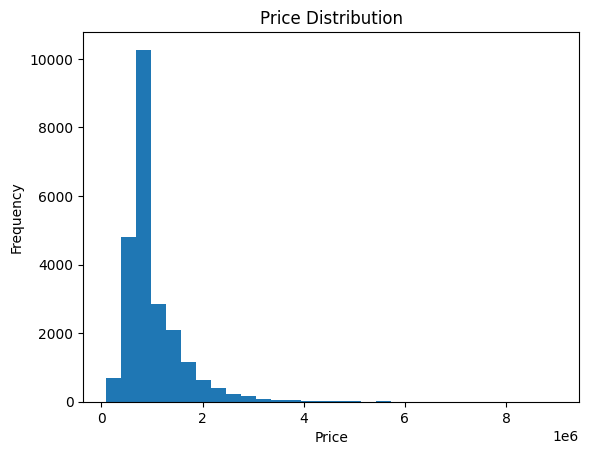

In [5]:
plt.hist(df["Price"], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


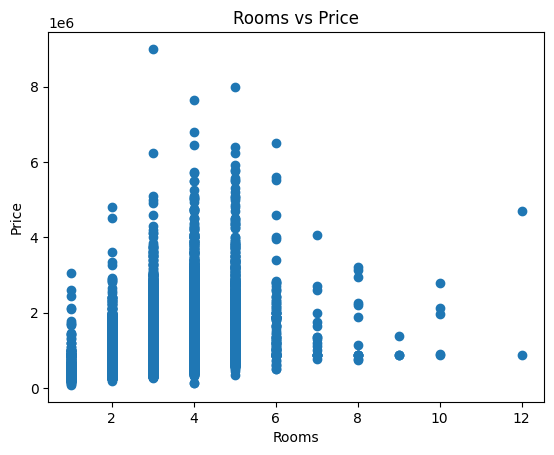

In [6]:
plt.scatter(df["Rooms"], df["Price"])
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.title("Rooms vs Price")
plt.show()


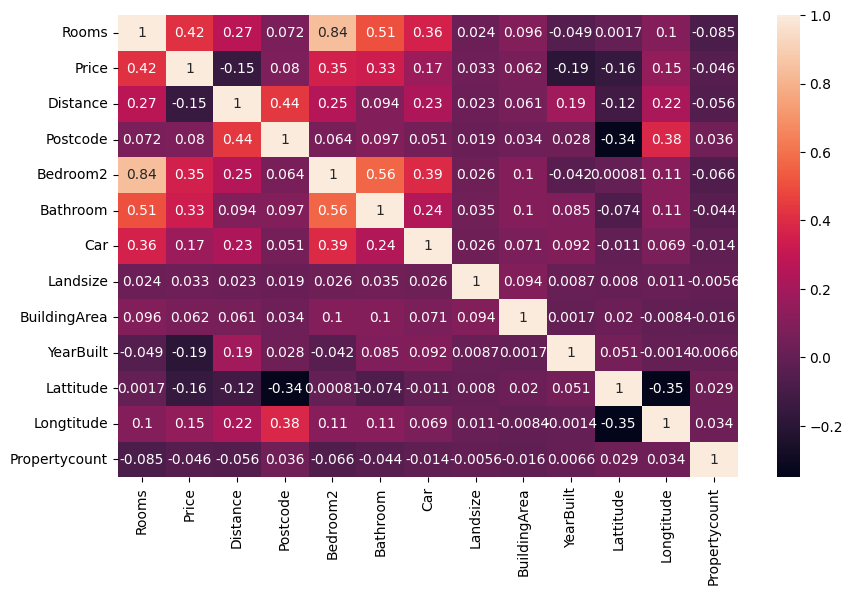

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


In [8]:
df.select_dtypes(include="object").columns


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [9]:
df.drop("Address", axis=1, inplace=True)

categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(col, ":", df[col].nunique())


Suburb : 336
Type : 3
Method : 9
SellerG : 330
Date : 58
CouncilArea : 34
Regionname : 8


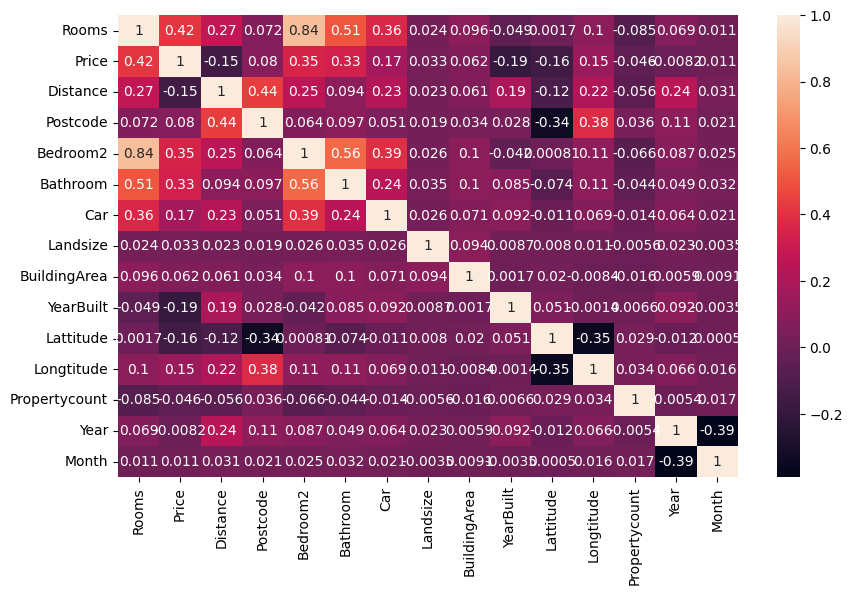

In [10]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

df.drop("Date", axis=1, inplace=True)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()



In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Suburb"] = le.fit_transform(df["Suburb"])
df["SellerG"] = le.fit_transform(df["SellerG"])


df = pd.get_dummies(
    df,
    columns=["Type", "Method", "CouncilArea", "Regionname"],
    drop_first=True,
    dtype= int
)

df.head()
df.shape


(23547, 67)

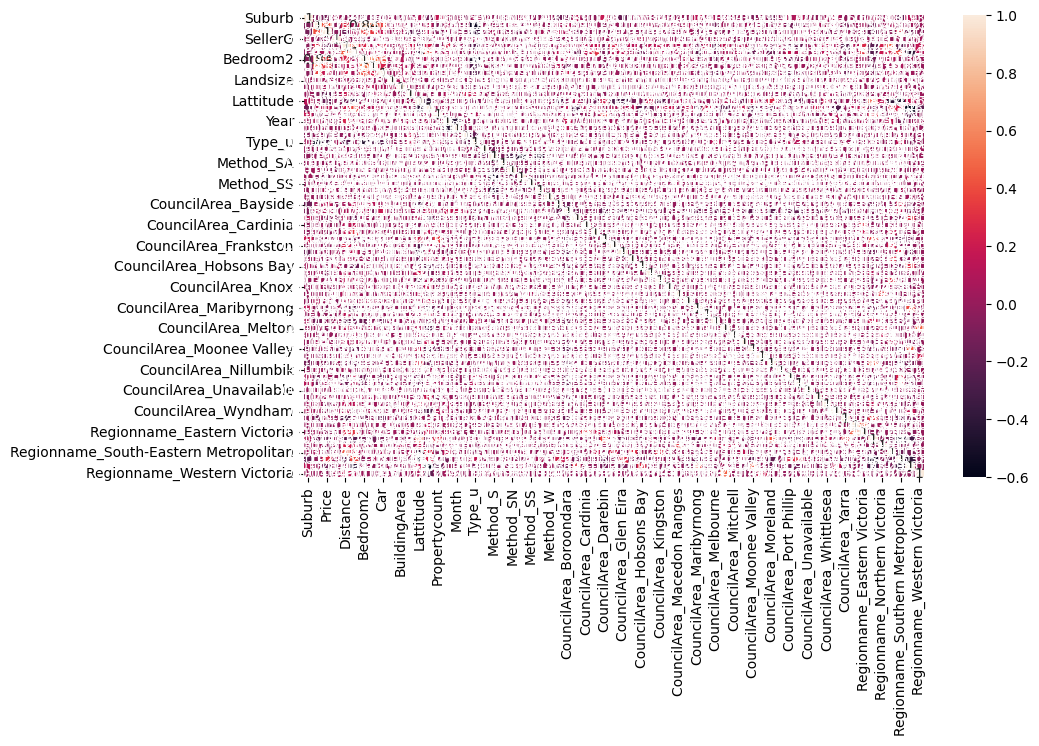

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [13]:
X = df.drop("Price", axis=1)
y = df["Price"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mse)
print("RMSE:", rmse)


R2 Score: 0.427492470215474
MSE: 199161105132.50153
RMSE: 446274.6969440476


In [19]:
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge R2: 0.4274910837776972
Ridge RMSE: 446275.23731399205


In [20]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso R2: 0.42749220605715554
Lasso RMSE: 446274.79990091175
